# Chapter 5 - Computing transformations with matrices

In [98]:
from draw3d import *

from transforms import *

from random import randint

from functools import reduce

In [37]:
def add(*vectors):
    return tuple(map(sum,zip(*vectors)))

def scale(scalar,v):
    return tuple(scalar * coord for coord in v)

def dot(u,v):    
    return sum([coord1 * coord2 for coord1,coord2 in zip(u,v)])

def linear_combination(scalars, *vectors):
    scaled = [scale(s, v) for s, v in zip(scalars, vectors)]
    return add(*scaled)

def multiply_matrix_vector(matrix, vector):
    return linear_combination(vector, *zip(*matrix))

def matrix_multiply(a,b):
    return tuple(tuple(dot(row, col) for col in zip(*b)) for row in a)

In [10]:
# zip to pivot list
B = (
    (0,2,1),
    (0,1,0),
    (1,0,-1)
)

v = (3,-2,5)

list(zip(*B))

[(0, 0, 1), (2, 1, 0), (1, 0, -1)]

In [13]:
multiply_matrix_vector(B,v)

(1, -2, -2)

In [14]:
# Matrix multiplication

A = (
    (1,1,0),
    (1,0,1),
    (1,-1,1)
)

B = (
    (0,2,1),
    (0,1,0),
    (1,0,-1)
)

v = (3,-2,5)

print(f"{list(zip(*A))=}")
print(f"{list(zip(*B))=}")

list(zip(*A))=[(1, 1, 1), (1, 0, -1), (0, 1, 1)]
list(zip(*B))=[(0, 0, 1), (2, 1, 0), (1, 0, -1)]


In [24]:
C = (
    (1, 2), 
    (3,4)
)

D = (
    (0, -1),
    (1, 0)
)

(multiply_matrix_vector(C,list(zip(*D))[1]))

(-1, -3)

In [18]:
print(multiply_matrix_vector(A,list(zip(*B))[0]))
print(multiply_matrix_vector(A,list(zip(*B))[1]))
print(multiply_matrix_vector(A,list(zip(*B))[2]))

(0, 1, 1)
(3, 2, 1)
(1, 0, 0)


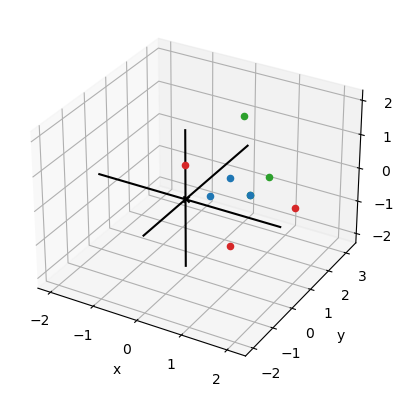

In [71]:
# Matrix multiplication

A = (
    (1,1,0),
    (1,0,1),
    (1,-1,1)
)

B = (
    (0,2,1),
    (0,1,0),
    (1,0,-1)
)

v = (3,-2,5)

colors = [blue, red, green]

draw3d(
    *[Points3D(*m, color=colors[i]) for i, m in enumerate([A, zip(*B), matrix_multiply(A,B)])]
)

In [77]:
# Exercise 5.1 

def infer_matrix(n, transformation):
    def standard_basis_vector(i):
        return tuple(1 if i==j else 0 for j in range(1, n+1))
    standard_basis = [standard_basis_vector(i) for i in range(1, n+1)]
    cols = [transformation(v) for v in standard_basis]
    return tuple(zip(*cols))

infer_matrix(3, rotate_z_by(pi/2))

((6.123233995736766e-17, -1.0, 0.0),
 (1.0, 1.2246467991473532e-16, 0.0),
 (0, 0, 1))

In [83]:
# Exercise 5.2
A = ((1.3, 0.7),
     (6.5, 3.2)
    )

b = (-2.5, 0.3)

multiply_matrix_vector(A, b)

(-3.04, -15.29)

In [105]:
# Exercise 5.3
def random_matrix(rows, cols, min=-2, max=2):
    return tuple(
        tuple(randint(min, max) for j in range(0, cols))
        for i in range(0, rows)
    )

reduce(matrix_multiply, [random_matrix(3,3) for m in range(0,5)])

((62, 27, -53), (-76, -22, 58), (-68, -26, 56))

In [107]:
# Exercise 5.4
A = random_matrix(3,3)
B = random_matrix(3,3)

print(f"{A=}")
print(f"{B=}")

print(f"{matrix_multiply(A,B)=}")
print(f"{matrix_multiply(B,A)=}")

A=((-2, 0, -2), (1, 2, -1), (-1, -2, 2))
B=((2, -2, -1), (-2, 1, 1), (0, 0, 1))
matrix_multiply(A,B)=((-4, 4, 0), (-2, 0, 0), (2, 0, 1))
matrix_multiply(B,A)=((-5, -2, -4), (4, 0, 5), (-1, -2, 2))
